In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
resp= requests.get('https://api.hh.ru/vacancies/18395992')

In [3]:
# resp.text
resp.status_code

200

In [4]:
# print(BeautifulSoup(resp.text, "lxml").text)

In [5]:
vac = resp.json()

In [6]:
vac.keys()

dict_keys(['alternate_url', 'branded_description', 'negotiations_url', 'relations', 'quick_responses_allowed', 'type', 'employment', 'published_at', 'area', 'site', 'code', 'archived', 'experience', 'description', 'response_letter_required', 'premium', 'address', 'billing_type', 'department', 'suitable_resumes_url', 'hidden', 'id', 'name', 'key_skills', 'schedule', 'response_url', 'specializations', 'apply_alternate_url', 'created_at', 'contacts', 'salary', 'accept_handicapped', 'test', 'employer', 'allow_messages'])

In [7]:
vac['description']

'<p><strong>О компании</strong></p> <p> </p> <p>Компания «Хомнет консалтинг» входит в TOP 20 ведущих партнеров фирмы «1С» в России и странах СНГ, а также находится в ТОР 5 по числу сертифицированных специалистов в Московском регионе. На рынке автоматизации «Хомнет консалтинг» работает с 2000 года.</p> <p> </p> <p><strong>Направление деятельности</strong></p> <p> </p> <p>У нас есть большой опыт в автоматизации процессов холдинговых структур. И недавно мы выделили эту деятельность в отдельное направление. Мы называем его CPM (Corporate perfomance management).</p> <p>Сейчас мы активно ищем людей, которые хотят реализовать себя как функциональный архитектор на проектах внедрения модулей CPM системы 1С:Управление холдингом.</p> <p>Если Вы чувствуете себя достаточно компетентным, чтобы быть таким человеком - добро пожаловать на позицию <strong>Функционального архитектора</strong>!</p> <p>Если Вы чувствуете, что пока не готовы, но это - Ваша цель на ближайшие 2-3 года - добро пожаловать в рол

In [8]:
print(BeautifulSoup(vac['description'], "lxml").text)

О компании   Компания «Хомнет консалтинг» входит в TOP 20 ведущих партнеров фирмы «1С» в России и странах СНГ, а также находится в ТОР 5 по числу сертифицированных специалистов в Московском регионе. На рынке автоматизации «Хомнет консалтинг» работает с 2000 года.   Направление деятельности   У нас есть большой опыт в автоматизации процессов холдинговых структур. И недавно мы выделили эту деятельность в отдельное направление. Мы называем его CPM (Corporate perfomance management). Сейчас мы активно ищем людей, которые хотят реализовать себя как функциональный архитектор на проектах внедрения модулей CPM системы 1С:Управление холдингом. Если Вы чувствуете себя достаточно компетентным, чтобы быть таким человеком - добро пожаловать на позицию Функционального архитектора! Если Вы чувствуете, что пока не готовы, но это - Ваша цель на ближайшие 2-3 года - добро пожаловать в роли ведущего аналитика!   Обязанности ведущего аналитика:     Участие в проектах в роли аналитика  Моделирование и прото

In [9]:
BeautifulSoup(vac['description'], "lxml").findAll('p')

[<p><strong>О компании</strong></p>,
 <p> </p>,
 <p>Компания «Хомнет консалтинг» входит в TOP 20 ведущих партнеров фирмы «1С» в России и странах СНГ, а также находится в ТОР 5 по числу сертифицированных специалистов в Московском регионе. На рынке автоматизации «Хомнет консалтинг» работает с 2000 года.</p>,
 <p> </p>,
 <p><strong>Направление деятельности</strong></p>,
 <p> </p>,
 <p>У нас есть большой опыт в автоматизации процессов холдинговых структур. И недавно мы выделили эту деятельность в отдельное направление. Мы называем его CPM (Corporate perfomance management).</p>,
 <p>Сейчас мы активно ищем людей, которые хотят реализовать себя как функциональный архитектор на проектах внедрения модулей CPM системы 1С:Управление холдингом.</p>,
 <p>Если Вы чувствуете себя достаточно компетентным, чтобы быть таким человеком - добро пожаловать на позицию <strong>Функционального архитектора</strong>!</p>,
 <p>Если Вы чувствуете, что пока не готовы, но это - Ваша цель на ближайшие 2-3 года - добр

In [17]:
url1 = 'https://api.hh.ru/vacancies?specialization=17.256&per_page=100&page='
url2 = 'https://api.hh.ru/vacancies?specialization=1.211&per_page=100&page='

In [18]:
urls =  []
for page in range(20):
    vac_list = requests.get(url1+str(page)).json()['items']
    urls += [x['url'] for x in vac_list]

In [19]:
for page in range(20):
    vac_list = requests.get(url2+str(page)).json()['items']
    urls += [x['url'] for x in vac_list]

In [20]:
len(urls)

4000

In [22]:
# data = []
# for url in urls:
#     data.append(requests.get(url).json())

In [30]:
import pickle
file = open('vac.pckl', 'rb')
data = pickle.load(file)

In [32]:
print(len(data))

4000


In [40]:
data_clean = [BeautifulSoup(x['description'], "lxml").text for x in data]

In [41]:
data_clean[0]

'"Гагаринский" Ведущий российский производитель мужской и женской обуви, компания RALF Ringer, приглашает на постоянную работу в свою команду Продавца-кассира!!   Обязанности:  Продажа обуви и аксессуаров Консультирование и обслуживание покупателей по ассортименту, действующей системе скидок, специальным предложениям Предпродажная подготовка, выкладка товара Поддержание чистоты и порядка в торговом зале Кассовое обслуживание (ОБУЧАЕМ РАБОТЕ С КАССОЙ!!!) Документооборот Участие в инвентаризации Инкассация Приемка товара Мерчендайзинг Выполнение плановых показателей и т.п.    Требования:  ОБЯЗАТЕЛЕН опыт работы от полугода в сфере продаж в розничной сети!!! Высокая работоспособность Клиентоориентированность Желание работать с красивой, стильной и качественной обувью Желание зарабатывать Готовность к обучению Активная жизненная позиция Умение найти подход к каждому клиенту    Условия:  Оклад фиксированный 25 000 руб. + % от личных продаж, совокупно от 50 000 руб. в месяц!! Оформление по Т

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
cv = CountVectorizer()

In [62]:
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [65]:
matrix  = cv.fit_transform(data_clean)
mx = matrix.toarray()
mx[0]

cos_sim_matrix = cosine_similarity(mx)
cos_sim_matrix[0]

array([ 1.        ,  0.23228269,  0.30740822, ...,  0.25007089,
        0.2675256 ,  0.21656873])

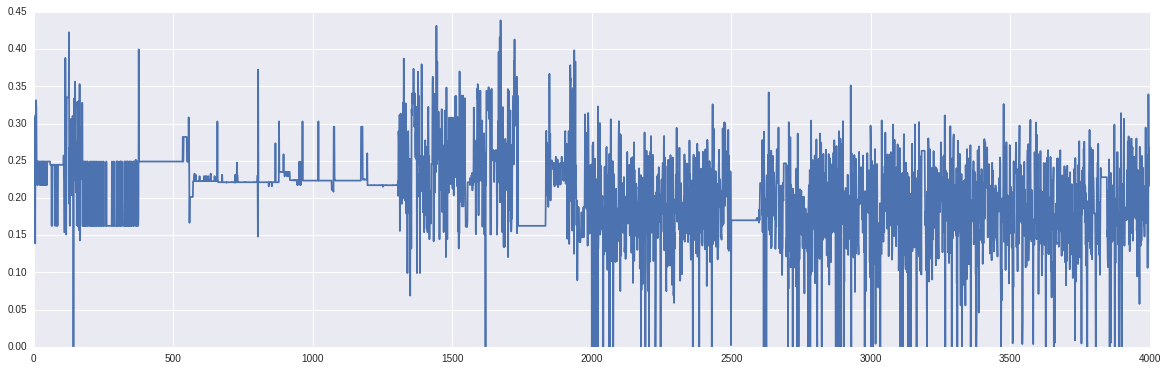

In [71]:
plt.figure(figsize=(20, 6))
plt.plot(cos_sim_matrix[0][1:])
plt.show()

In [ ]:
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за", "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг", "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять", "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по", "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек", "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил", "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно", "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом", "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец", "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]

cv2 = CountVectorizer(stop_words=stop_words, max_features=100000, ngram_range=(1, 2))

matrix2  = cv2.fit_transform(data_clean)
mx2 = matrix2.toarray()
cos_sim_matrix2 = cosine_similarity(mx2)

plt.figure(figsize=(20, 6))
plt.plot(cos_sim_matrix2[0][1:])
plt.show()